# Exploration Numérique I
#### Par Shikang Du et Haolin Pan

## Import the packages

In [1]:
import numpy as np;
import pandas as pd;
import scipy.stats as sps;
import math
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### Question I:

In [3]:
markNum_VisitTeam = pd.DataFrame([[0, 692],[1,680],[2, 335], [3, 131], [4,51], [5,11]])
markNum_VisitTeam.columns = ["Nombre de buts marques", "Nombre d'observation"]

In [4]:
markNum_VisitTeam

,Nombre de buts marques,Nombre d'observation
0,0,692
1,1,680
2,2,335
3,3,131
4,4,51
5,5,11


In [5]:
markNum_dict = markNum_VisitTeam["Nombre d'observation"]

### Question II:

D'abord, on doit calculer le logarithme de vraisemblance, On note markNum_dict[k] par $N[k]$

$$ L(\lambda) = \sum_{k = 0}^{5} \log(  p_\lambda(k)^{ N[k]} )$$
$$ L(\lambda) = \sum_{k = 0}^{5} N[k]\times (k \log (\lambda) - \lambda) - \mathrm{log}(k!)$$

Donc notre objectif est de maximiser $\sum_{k = 0}^{5} N[k]\times (k \log(\lambda) - \lambda)$

On fait une dérivation: 
$$ \dfrac{\mathrm{d} L(\lambda)}{\mathrm{d}\lambda} = \sum_{k = 0}^{5} N[k] \times( k / \lambda - 1)$$
On cherche $\hat \lambda$ tel que $\dfrac{\mathrm{d}L(\hat \lambda)}{\mathrm{d}\lambda} = 0$

Quand $\sum_k N[k] \neq 0 $(vérifié dans ce cas), on a:
$$ \hat \lambda = \dfrac{\sum_k N[k] \times k}{ \sum_k{N[k]} }$$


In [6]:
# Calculs Numerique:
def Estim_VS(markNum_dict):
    lambda_h = 0;
    for i in range(len(markNum_dict.keys())):
        lambda_h += markNum_dict[i] * i;
    lambda_h /= sum(markNum_dict)
    return lambda_h;

In [7]:
est_lambda1 = Estim_VS(markNum_dict)
print(est_lambda1)

1.05368421053


### Question III

Pour le loi Poisson, le moment d'ordre 2 est $\lambda^2 + \lambda$

Donc pour l'estimateur d'ordre 2, on cherche en effet $\lambda$ tel que:

$$\lambda^2 + \lambda = \sum_{k=0}^5 \dfrac{N[k]}{\sum_{k} N[k]}\times k^2$$

Comme $\lambda$ est forcément positive, il reste seulement une solution valable.

$$ \tilde{\lambda} = - \dfrac{1}{2} + \sqrt{\sum_{k=0}^5 \dfrac{N[k]}{\sum_{k} N[k]}\times k^2 + \dfrac{1}{4}} $$

In [8]:
# Calculs Numérique:
def Estim_M2(markNum_dict):
    lambda_t = 0;
    for i in range(len(markNum_dict.keys())):
        lambda_t += markNum_dict[i] * i * i;
    lambda_t /= sum(markNum_dict.values)
    lambda_t += 1/4;
    lambda_t = math.sqrt(lambda_t);
    lambda_t -= 1/2;
    return lambda_t

In [9]:
est_lambda2 = Estim_M2(markNum_dict)
print(est_lambda2)

1.083633397236275


### Question IV

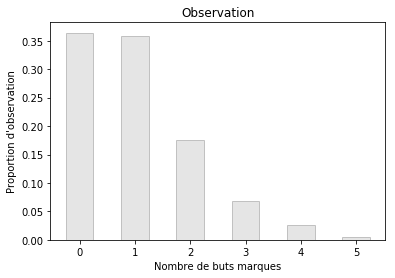

In [10]:
count = markNum_dict
keys = range(6);
total = sum(count)
obser = []
for i in count:
    obser.append(i / total)
plt.bar(keys, obser, edgecolor = "black", color = "grey", width = 0.5, alpha = 0.2)

plt.title('Observation')
plt.xlabel('Nombre de buts marques')
plt.ylabel('Proportion d\'observation')

In [11]:
#La loi Poisson
poisson = sps.poisson(Estim_VS(markNum_dict))

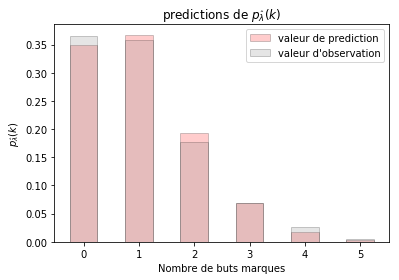

In [12]:
keys = markNum_dict.keys()
count_V = poisson.pmf(keys)
plt.bar(keys, count_V, edgecolor = "black", color = "red", width = 0.5, alpha = 0.2)
plt.bar(keys, obser, edgecolor = "black", color = "grey", width = 0.5, alpha = 0.2)
plt.title('predictions de $p_{\hat\lambda}(k)$')
plt.xlabel('Nombre de buts marques')
plt.ylabel('$p_{\hat\lambda}(k)$')
plt.legend(('valeur de prediction', 'valeur d\'observation'))


In [13]:
poisson = sps.poisson(Estim_M2(markNum_dict))

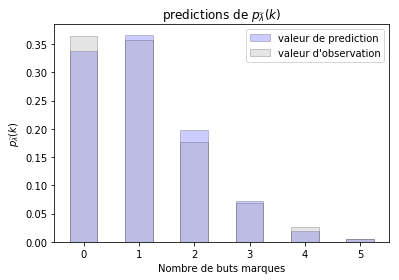

In [14]:
keys = range(6)
count_M = poisson.pmf(keys)
plt.bar(keys, count_M, edgecolor = "black", color = "blue", width = 0.5, alpha = 0.2)
plt.bar(keys, obser, edgecolor = "black", color = "grey", width = 0.5, alpha = 0.2)
plt.title('predictions de $p_{\widetilde\lambda}(k)$')
plt.xlabel('Nombre de buts marques')
plt.ylabel('$p_{\widetilde\lambda}(k)$')
plt.legend(('valeur de prediction', 'valeur d\'observation'))


#### comparation

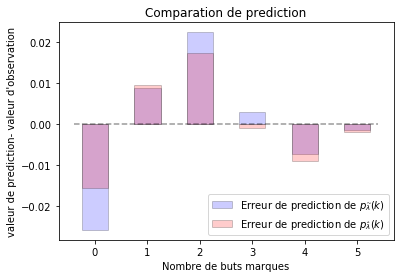

In [22]:
plt.bar(keys, count_M - obser, edgecolor = "black", color = "blue", width = 0.5, alpha = 0.2)
plt.bar(keys, count_V - obser, edgecolor = "black", color = "red", width = 0.5, alpha = 0.2)

plt.title('Comparation de prediction')
plt.ylabel('valeur de prediction- valeur d\'observation')
plt.xlabel('Nombre de buts marques')
plt.legend(('Erreur de prediction de $p_{\widetilde\lambda}(k)$', 'Erreur de prediction de $p_{\hat\lambda}(k)$'))
plt.plot([-0.4, 5.4], [0, 0], "k--", alpha = 0.4)

#### Compare the precision of the 2 models.
Maintenant, on veut comparer la précision de deux models par la fonction objectif (cost function);

Par la définition, la fonction objectif est la racine de la somme de carré erreur.

In [16]:
def CostFunction(estim, markNum_dict):
    poisson = sps.poisson(estim)
    keys = list(markNum_dict.keys())
    proportion = poisson.pmf(keys)
    total = sum(markNum_dict)
    estim_count = [];
    for i in keys:
        estim_count.append(total * proportion[i]);
#     print(estim_count);
    error_total = 0;
    for i in keys:
        error_total += (estim_count[i] - markNum_dict[i]) * (estim_count[i] - markNum_dict[i]);
    return math.sqrt(error_total);

In [17]:
CostFunction(Estim_VS(markNum_dict), markNum_dict)

50.75260566540501

In [18]:
CostFunction(Estim_M2(markNum_dict), markNum_dict)

68.75625692152445

**Par conséquence, l'estimateur de maximum de vraisemblace  a une meilleure précision.**

### Question V

On doit calculer le logarithme de vraisemblance. On note:
$$
L(p) = \Pi_{i=0}^{5} \left( {n \choose k} p^i (1-p)^{n-i} \right)^{N[i]}
$$
Donc 
$$
\log L(p) = \sum_{i=0}^{5} N[i]\left(\log {n \choose k} + i\log p+ (n-i) \log(1-p) \right)
$$

et on a : 
$$
\frac{\mathrm{d}\log L(p)}{\mathrm{d}p} = \sum_{i=0}^{5} N[i] \left( \frac{i}{p} - \frac{n-i}{1-p}\right)
$$

Donc on va trouver $\hat p$, tel que $$\frac{\mathrm{d}\log L(p)}{\mathrm{d}p}(\hat p) = 0$$
Donc on a $$\hat p = \frac{\sum i N[i]}{n\sum N[i]}$$

In [19]:
# Calculs Numérique:
def Estim_Binomale(markNum_dict, n=30):
    iNi = 0
    nNi = 0
    for i in range(len(markNum_dict.keys())):
        iNi += i*markNum_dict[i]
    nNi = sum(markNum_dict) * n
    return iNi / nNi

In [20]:
est_p = Estim_Binomale(markNum_dict)
print(est_p)

0.0351228070175


### Question VI

In [21]:
# simulation
n = 30
est_lambda1 / n / est_p

1.0

Donc on a trouvé la relation :
$$\hat p \cdot n = \hat \lambda$$

__Explication__

Quand $n$ est ainsi grand et $p$ est ainsi petit, la loi de Binominale converge vers la loi de Poission. 
$$ \lim_{n \rightarrow \infty} {n \choose k} p^{k} (1-p)^{n-k} \\
 = \lim_{n \rightarrow \infty}\frac{n(n-1)...(n-k+1)}{k!}\left(\frac{\lambda}{n}\right)^{k} \left(1-\frac{\lambda}{n}\right
 )^{1-k} \\
 = \lim_{n \rightarrow \infty}\frac{n^k + O(n^{k-1})}{k!}\left(\frac{\lambda}{n}\right)^{k} \left(1-\frac{\lambda}{n}\right
 )^{1-k}\\
 = \lim_{n \rightarrow \infty}\frac{\lambda^k}{k!}\left(1-\frac{\lambda}{n}\right
 )^{1-k}
 $$

Avec
$$
\lim_{n\to\infty} \left(1-\frac{\lambda}{n}\right)^{n} = e^{-\lambda}
$$
et 
$$
\lim_{n\to\infty} \left(1- \frac{\lambda}{n}\right)^{-k}=1
$$
Donc on a :
$$
{n \choose k}p^k (1-p)^{n-k} \simeq \frac{\lambda^k e^{-\lambda}}{k!}
$$

$n = 30 \leq 10$ est suffisant grand, et $p=0.04 < 0.1$ est suffisant petit.